# Load packages

In [3]:
import scipy.integrate
import numpy as np
import os
import matplotlib.pyplot as plt

# Experiment on MAR mechanism 

## Define the densities functions and the born of our integrals

In [22]:
def f1(u,t,rho=0.5):
            return (1/2*np.pi*np.sqrt(1-np.power(rho,2)))*np.exp(-(np.power(u,2)-2*rho*u*t+np.power(t,2))/(2*(1-np.power(rho,2))))

def gfun(s1=0.5):
    return s1

def hfun(x):
    return np.inf

def f2(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-np.power(x,2)/2)

In [23]:
rho_array=np.arange(-0.99,1,0.01)


## Computation of the probabilities 

In [24]:
def prob2(s1,rho_array=rho_array,f2=f2,gfun=gfun,hfun=hfun):
    prob=[]
    for rho in rho_array:
        def f1(u,t,rho=rho):
            return (1/(2*np.pi*np.sqrt(1-np.power(rho,2))))*np.exp(-(np.power(u,2)-2*rho*u*t+np.power(t,2))/(2*(1-np.power(rho,2))))
        num_1=scipy.integrate.dblquad(f1, s1,np.inf , gfun(s1=s1), hfun)[0]
        num_2=scipy.integrate.dblquad(f1,-np.inf,-s1,gfun(s1=s1),hfun)[0]
        den=scipy.integrate.quad(f2, s1, np.inf)[0]
        prob.append((num_1+num_2)/den)

    return prob
        
    
        
    

In [40]:
def plot_proba(s_array,save=False,name=None):
    plt.rcParams['text.usetex'] = True
    f,ax=plt.subplots(1,figsize=(8,6))
    for s in s_array:
        prob_2=prob2(s1=s)
        img=ax.plot(rho_array,prob_2)
        ax.text(-0.05,min(prob_2)+0.01,"=".join(["s",str(s)]),fontsize="12",color=img[0].get_color())
    ax.set_xlabel("Correlation",fontsize=16)
    ax.set_ylabel(r'$\mathrm{P}((x_{2}\geq s)\bigcup(x_{2}\leq -s)|x_{1}\geq s)$',fontsize=16)
    ax.set_title("The evolution of $\mathrm{P}((x_{2}\geq s)\bigcup(x_{2}\leq -s)|x_{1}\geq s)$ as a function of the correlation for several values of s",fontsize=16)
    if save:
        directory = os.getcwd()
        tmp_fig_path="\ ".join([directory,name])
        fig_path=tmp_fig_path.replace(" ","")
        plt.savefig(fig_path)
    plt.show()

In [42]:
plot_proba(s_array=np.array([0.1,0.2,0.3]),save=True,name="proba_correlation.png")

# Experiment on the impact of correlation on the mean 

In [4]:
def mean_bias(rho_array,s,n=500,nb_simu=100):
    mu=[0,0]
    rho_mean=[]
    for rho in rho_array:
        cov=np.array([[1,rho],[rho,1]])
        list_mean=[]
        for i in range(nb_simu):
            data=np.random.multivariate_normal(mu,cov,n)
            x1=data[:,0]
            x2=data[:,1]
            mask=x1<s
            x2[mask]=np.nan
            m=np.nanmean(x2)
            list_mean.append(m)
        rho_mean.append(list_mean)
    return rho_mean
            
        
        
        

In [5]:
np.around(np.arange(-0.9,1,0.1),2)

array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [6]:
rho_array=np.around(np.arange(-0.9,1,0.1),2)


In [7]:
rho_test=mean_bias(rho_array=rho_array,s=0.5)

In [8]:
def box_plot(ax,data, edge_color,perc_l):
    bp = ax.boxplot(data, patch_artist=True,labels=perc_l)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor="white")       

    return bp

In [11]:
def boxplot_mean(rho_mean,rho_array,s,save=False,name=None):
    f,ax=plt.subplots(figsize=(8,6))
    bp=box_plot(ax=ax,data=rho_mean,edge_color="blue",perc_l=rho_array)
    ax.axhline(y = 0, color = 'r', linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=14)
    ax.set_ylabel("Mean",fontsize=14)
    ax.set_title(" ".join(["Boxplot of the evolution of the mean of $x_2$ \n as a function of the correlation between $(x_1,x_2)$,s=",str(s)]),fontsize=14)
    if save :
        directory = os.getcwd()
        tmp_fig_path="\ ".join([directory,name])
        fig_path=tmp_fig_path.replace(" ","")
        plt.savefig(fig_path)
        
    plt.show()

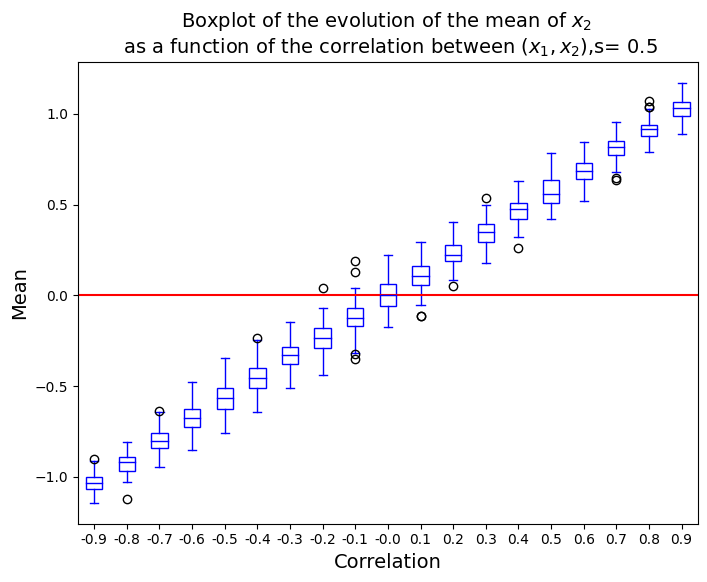

In [12]:
boxplot_mean(rho_test,rho_array=rho_array,s=0.5,save=True,name="mean_boxplot.png")

In [27]:
def boxplot_mean_2(rho_array,s_array):
    f,ax=plt.subplots(figsize=(8,6))
    bp_color=["#4800f0","#524670","#e7568c","#e4f118","#51c482","#446853","#f6a72d","#dfae9c","#b8b8b8","#009eff"]
    col=0
    legend=[]
    legend_color=[]
    for s in s_array:
        rho_test=mean_bias(rho_array=rho_array,s=s)
        bp=box_plot(ax=ax,data=rho_test,edge_color=bp_color[col],perc_l=rho_array)
        col+=1
        legend_color+=[bp["boxes"][0]]
        legend+=["=".join(["s",str(s)])]
    ax.legend(legend_color,legend)
    ax.axhline(y = 0, color = "black", linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=14)
    ax.set_ylabel("Mean",fontsize=14)


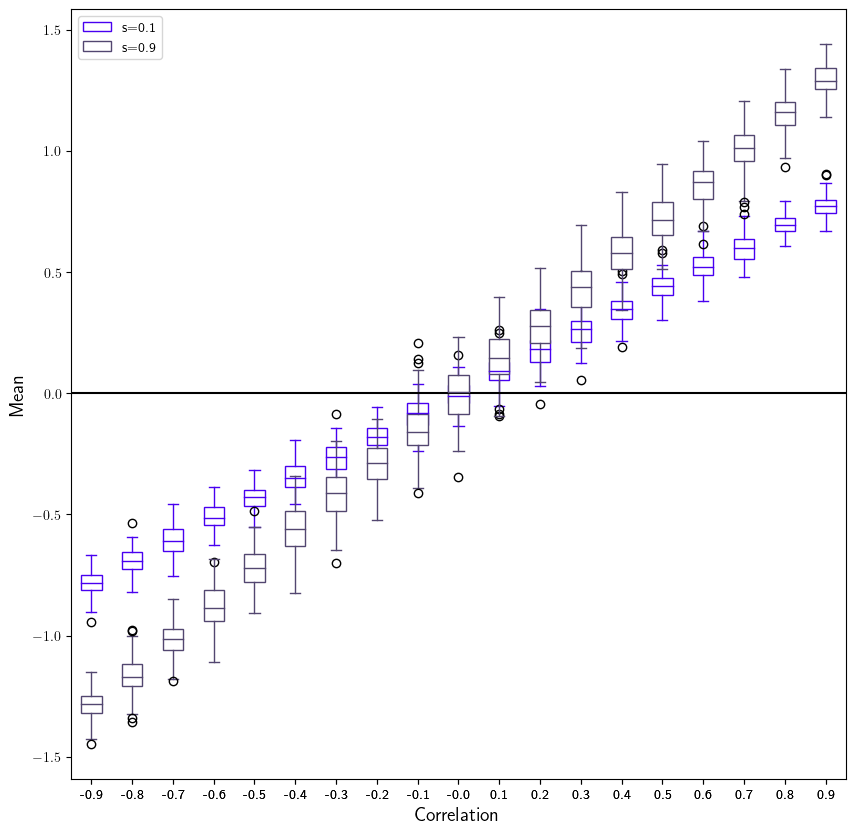

In [28]:
boxplot_mean_2(rho_array=rho_array,s_array=[0.1,0.9])

In [66]:
def plot_mean(rho_array,s_array,save=False,name=None):
    f,ax=plt.subplots(figsize=(10,6))
    legend=[]
    for s in s_array:
        rho_test=mean_bias(rho_array=rho_array,s=s,n=50000)
        ax.plot(rho_array,np.mean(rho_test,1))
        legend+=["=".join(["s",str(s)])]
    ax.legend(legend)
    ax.axhline(y = 0, color = "black", linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=20)
    ax.set_ylabel("Mean",fontsize=20)
    ax.set_title("Evolution of the mean of $x_2$ as a function of the correlation \n for several values of the threshold s",fontsize=22)
    ax.tick_params(axis="x",labelsize=20)
    ax.tick_params(axis="y",labelsize=20)
    if save :
        directory = os.getcwd()
        tmp_fig_path="\ ".join([directory,name])
        fig_path=tmp_fig_path.replace(" ","")
        plt.savefig(fig_path)
    plt.show()

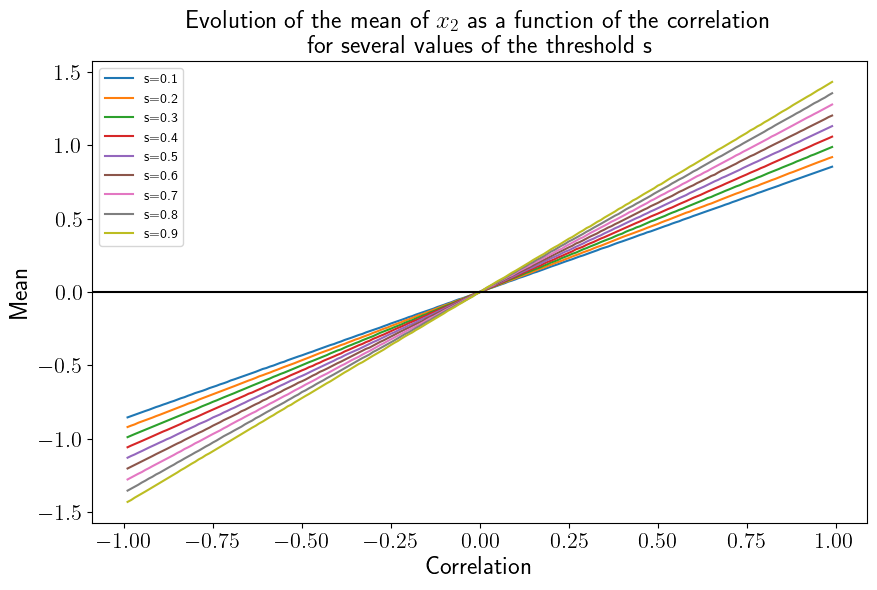

In [72]:
plot_mean(rho_array=np.around(np.arange(-0.99,1,0.01),2),s_array=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],save=True,name="mean_thresholds.png")

# Bias on the standard deviation

In [14]:
def std_bias(rho_array,s,n=500,nb_simu=100):
    mu=[0,0]
    rho_std=[]
    for rho in rho_array:
        cov=np.array([[1,rho],[rho,1]])
        list_std=[]
        for i in range(nb_simu):
            data=np.random.multivariate_normal(mu,cov,n)
            x1=data[:,0]
            x2=data[:,1]
            mask=x1<s
            x2[mask]=np.nan
            std=np.nanstd(x2)
            list_std.append(std)
        rho_std.append(list_std)
    return rho_std
            
        
        

In [16]:
def boxplot_std(rho_std,rho_array,s,save=False,name=None):
    f,ax=plt.subplots(figsize=(8,6))
    bp=box_plot(ax=ax,data=rho_std,edge_color="blue",perc_l=rho_array)
    ax.axhline(y = 1, color = 'r', linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=14)
    ax.set_ylabel("Standard deviation",fontsize=14)
    ax.set_title(" ".join(["Boxplot of the evolution of the standard deviation of $x_2$ \n as a function of the correlation between $(x_1,x_2)$,s=",str(s)]),fontsize=14)
    if save :
        directory = os.getcwd()
        tmp_fig_path="\ ".join([directory,name])
        fig_path=tmp_fig_path.replace(" ","")
        plt.savefig(fig_path)

    plt.show()

In [17]:
rho_ar=np.around(np.arange(-0.9,1,0.1),2)
rho_t=std_bias(rho_array=rho_ar,s=0.5)

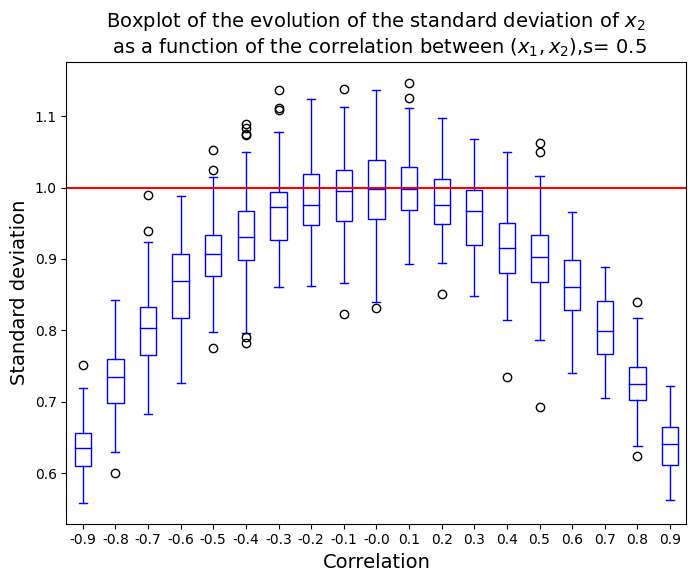

In [18]:
boxplot_std(rho_t,rho_array=rho_ar,s=0.5,save=True,name="std_boxplot.png")

In [ ]:
def boxplot_std_2(rho_array,s_array):
    f,ax=plt.subplots(figsize=(10,10))
    bp_color=["#4800f0","#524670","#e7568c","#e4f118","#51c482","#446853","#f6a72d","#dfae9c","#b8b8b8","#009eff"]
    col=0
    legend=[]
    legend_color=[]
    for s in s_array:
        rho_test=std_bias(rho_array=rho_array,s=s)
        bp=box_plot(ax=ax,data=rho_test,edge_color=bp_color[col],perc_l=rho_array)
        col+=1
        legend_color+=[bp["boxes"][0]]
        legend+=["=".join(["s",str(s)])]
    ax.legend(legend_color,legend)
    ax.axhline(y = 1, color = "black", linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=14)
    ax.set_ylabel("Std",fontsize=14)


In [ ]:
boxplot_std_2(rho_array=rho_ar,s_array=[0.1,0.3,0.5,0.7,0.9])

In [70]:
def plot_std(rho_array,s_array,save=False,name=None):
    f,ax=plt.subplots(figsize=(10,6))
    legend=[]
    for s in s_array:
        rho_test=std_bias(rho_array=rho_array,s=s,n=50000)
        ax.plot(rho_array,np.mean(rho_test,1))
        legend+=["=".join(["s",str(s)])]
    ax.legend(legend)
    ax.axhline(y = 1, color = "black", linestyle = '-')
    ax.set_xlabel("Correlation",fontsize=20)
    ax.set_ylabel("Std",fontsize=20)
    ax.set_title("Evolution of the standard deviation of $x_2$ as a function of the correlation \n for several values of the threshold s",fontsize=22)
    ax.tick_params(axis="y",labelsize=20)
    ax.tick_params(axis="x",labelsize=20)
    if save :
        directory = os.getcwd()
        tmp_fig_path="\ ".join([directory,name])
        fig_path=tmp_fig_path.replace(" ","")
        plt.savefig(fig_path)
    plt.show()

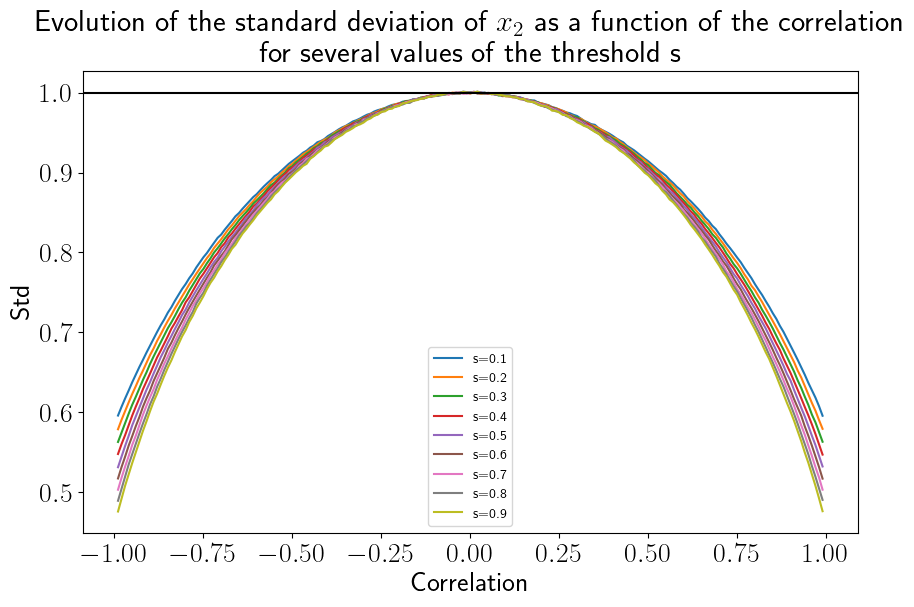

In [73]:
plot_std(rho_array=np.around(np.arange(-0.99,1,0.01),2),s_array=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],save=True,name="std_thresholds.png")

# Bias on the covariance 

In [77]:
def covariance(x1,x2):
    m1=np.mean(x1)
    m2=np.nanmean(x2)
    sum=0
    N=0
    l=x1.shape[0]
    for i in range(l):
        if (not np.isnan(x2[i])):
            sum+=(x1[i]-m1)*(x2[i]-m2)
            N+=1
    cov=sum/N
    return cov
        

In [74]:
def cov_bias(rho_array,s,n=500,nb_simu=100):
    mu=[0,0]
    rho_cov=[]
    for rho in rho_array:
        cov=np.array([[1,rho],[rho,1]])
        list_bias=[]
        for i in range(nb_simu):
            data=np.random.multivariate_normal(mu,cov,n)
            x1=data[:,0]
            x2=data[:,1]
            mask=x1<s
            x2[mask]=np.nan
            cov_tmp=covariance(x1,x2)
            list_bias.append(cov_tmp-rho)
        rho_cov.append(list_bias)
    return rho_cov
            
        
        

In [78]:
def boxplot_cov(rho_cov,rho_array):
    f,ax=plt.subplots(figsize=(8,6))
    bp=box_plot(ax=ax,data=rho_cov,edge_color="blue",perc_l=rho_array)
    ax.axhline(y = 0, color = 'r', linestyle = '-')
    ax.set_xlabel("Covariance",fontsize=14)
    ax.set_ylabel("Bias on covariance",fontsize=14)
    plt.show()

In [79]:
co=cov_bias(rho_array=rho_ar,s=0.5,n=50000,nb_simu=100)

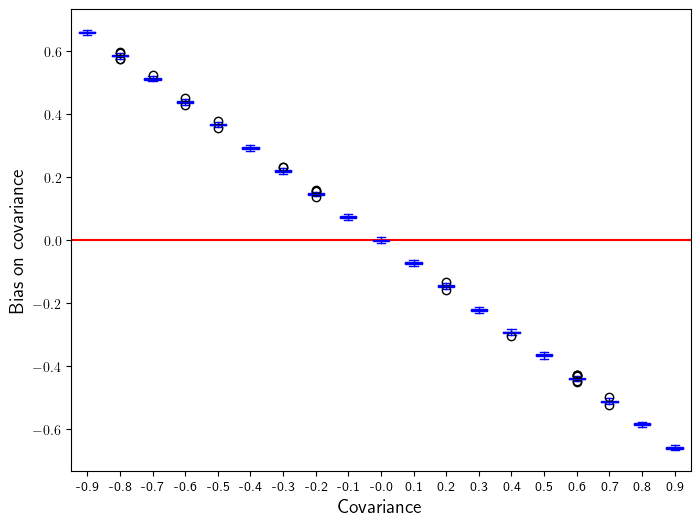

In [80]:
boxplot_cov(rho_cov=co,rho_array=rho_ar)